In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


W późniejszych etapach projektu będziemy pracować na DataFrame z wybranymi kolumnami.
Na tą chwilę wczytujemy jeszcze pełne dane.
Zbiory danych można pobrać pod linkiem:<br>
https://www.kaggle.com/datasets/usdot/flight-delays

In [ ]:
# czy wczytać wszystkie kolumny , czy tylko wybrane (dotyczy lotów)
ALL_COLS = True

# Wczytanie danych

## Lotniska

W pliku 'airports.csv' zapisane są m.in. współrzędne lotnisk.

In [ ]:
df_airports = pd.read_csv('/content/drive/MyDrive/airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
df_airports.shape

(322, 7)

In [ ]:
df_airports.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


### Lotniska bez współrzędnych

In [ ]:
# mamy 322 unikalne kody lotnisk
df_airports['IATA_CODE'].value_counts()

ABE    1
PIB    1
MVY    1
MTJ    1
MSY    1
      ..
EWR    1
EWN    1
EVV    1
EUG    1
YUM    1
Name: IATA_CODE, Length: 322, dtype: int64

In [ ]:
df_airports[df_airports['LATITUDE'].isna()]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [ ]:
# lotniska bez współrzędnych - lista symboli
airports_Nan = df_airports[df_airports['LATITUDE'].isna()]['IATA_CODE'].tolist()
airports_Nan

['ECP', 'PBG', 'UST']

### Usunięcie bez wsp. (NaN)

In [ ]:
#df_airports.dropna(axis=0, how='any', inplace=True)
df_airports.shape

(322, 7)

In [ ]:
df_airports.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


## Loty

In [ ]:
if ALL_COLS:
  df_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')
else:
  df_flights = pd.read_csv('/content/drive/MyDrive/flights.csv',
                   usecols=['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
                            'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                            'SCHEDULED_DEPARTURE', 'DISTANCE',
                            'ARRIVAL_DELAY', 'CANCELLED', 'DIVERTED'])

<ipython-input-12-1037f7f2fed4>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


In [ ]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
df_flights['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
11503         1
14222         1
13964         1
13459         1
12265         1
Name: ORIGIN_AIRPORT, Length: 930, dtype: int64

W kolumnach ORIGIN_AIRPORT i DESTINATION_AIRPORT dane przedstawione są w postaci int oraz str - wybieramy jeden typ str

In [ ]:
# zmiana typu kolumn 7 i 8 na string
df_flights['ORIGIN_AIRPORT'] = df_flights['ORIGIN_AIRPORT'].astype(str)
df_flights['DESTINATION_AIRPORT'] = df_flights['DESTINATION_AIRPORT'].astype(str)

In [ ]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_flights.shape

(5819079, 31)

In [ ]:
df_flights.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

### Wykresy

Przedstawiam wykresy dla danych numerycznych

In [ ]:
df_list = list(df_flights.select_dtypes(include=np.number).columns) # lista kolumn numerycznych
df_list

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'FLIGHT_NUMBER',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [ ]:
len(df_list)

26

In [ ]:
df_list.remove('ARRIVAL_DELAY')

In [ ]:
# rozmiar czcionki do wykresów
plt.rc('font', size=6)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=6)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=6)
plt.rc('figure', titlesize=6)

In [ ]:
nrow=5  # ilość wierszy - do wykresów
ncol=5  # ilość kolumn

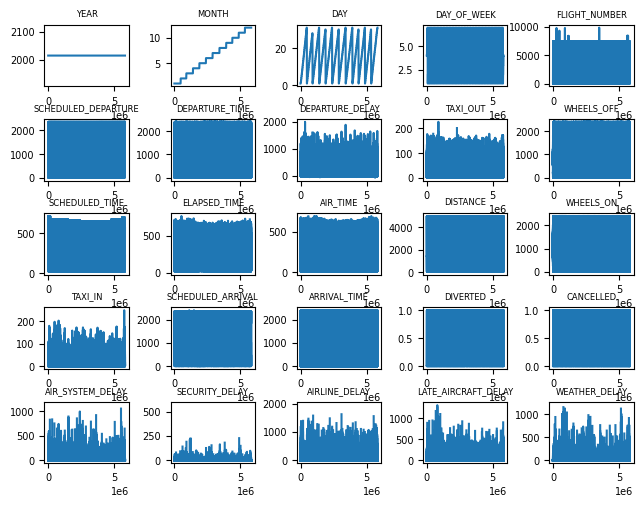

In [ ]:
# histogramy wszystkich zmiennych numerycznych

fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
fig.tight_layout()

count=0
for r in range(nrow):
    for c in range(ncol):
        df_flights[df_list[count]].plot(ax=axes[r,c])
        axes[r,c].set_title(df_list[count])
        count+=1

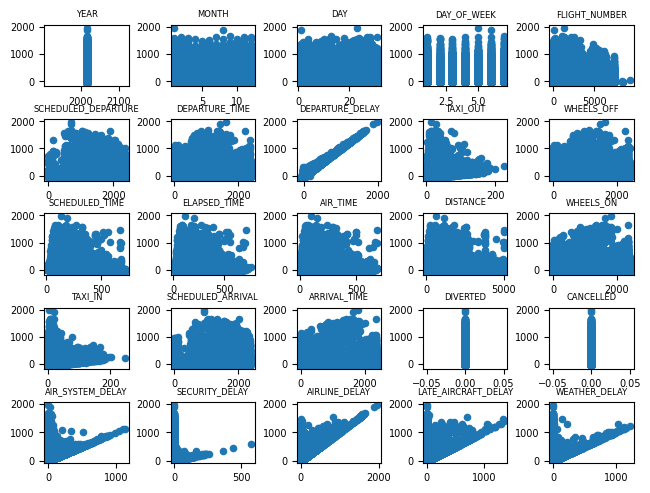

In [ ]:
# zależność opóźnienia przylotu od pozostałych zmiennych numerycznych

fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
fig.tight_layout()

count=0
for r in range(nrow):
    for c in range(ncol):
        df_flights.plot.scatter(df_list[count], 'ARRIVAL_DELAY', ax=axes[r,c])
        axes[r,c].set_title(df_list[count])
        axes[r,c].set(xlabel=None)
        axes[r,c].set(ylabel=None)
        count+=1

Największa korelacja jest ze zmienną 'DEPARTURE_DELAY', która przedstawia całkowite opóźnienie wylotu. Jeśli jej użyjemy do predykcji, skutkiem będzie wyciek danych!!!

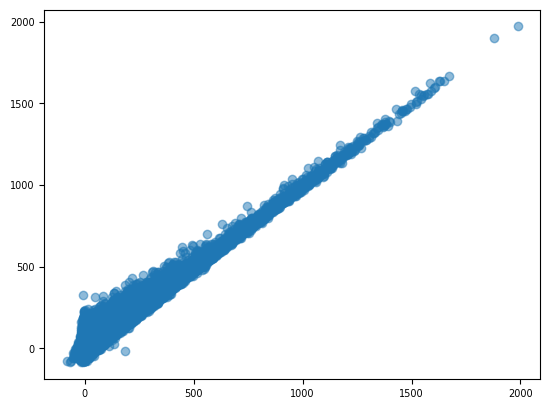

In [ ]:
plt.scatter(x=df_flights['DEPARTURE_DELAY'], y=df_flights['ARRIVAL_DELAY'], alpha=.5)

Nasz target 'ARRIVAL_DELAY' najbardzie koreluje ze zmiennymi, których nie możemy użyć do przewidywania opóźnień

<Axes: >

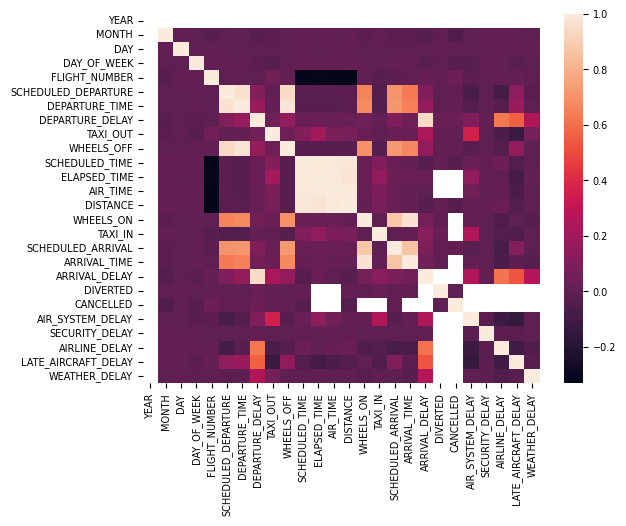

In [ ]:
sns.heatmap(df_flights.corr(numeric_only=True))

### Info

In [ ]:
# ilość wierszy bez opóźnienia przylotu (wartość NaN)
df_flights['ARRIVAL_DELAY'].isna().sum()

105071

Kolumna 'ARRIVAL_DELAY' ma 105071 wierszy z NaN - jest to suma lotów anulowanych (89884) i przekierowanych (15187)

In [ ]:
# ilość lotów anulowanych (89884)
len(df_flights[df_flights['CANCELLED']==1])

89884

In [ ]:
# ilość lotów przekierowanych (15187)
len(df_flights[df_flights['DIVERTED']==1])

15187

In [ ]:
df_flights.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

In [ ]:
df_flights['ORIGIN_AIRPORT'].value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In [ ]:
df_flights['DESTINATION_AIRPORT'].value_counts()

ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
          ...  
10165         9
14222         9
13502         7
11503         3
10666         1
Name: DESTINATION_AIRPORT, Length: 629, dtype: int64

### Loty z lotniskami bez współrzęnych

In [ ]:
o1 = df_flights['ORIGIN_AIRPORT']==airports_Nan[0]
o2 = df_flights['ORIGIN_AIRPORT']==airports_Nan[1]
o3 = df_flights['ORIGIN_AIRPORT']==airports_Nan[2]
d1 = df_flights['DESTINATION_AIRPORT']==airports_Nan[0]
d2 = df_flights['DESTINATION_AIRPORT']==airports_Nan[1]
d3 = df_flights['DESTINATION_AIRPORT']==airports_Nan[2]

# ilość lotów z lotniskami bez wsp. (odlot lub przylot)
len(df_flights[o1 | o2 | o3 | d1 | d2 | d3])

9215

In [ ]:
 #ilość odlotów i przylotów z lotnisk bez wsp.
len(df_flights[o1 | o2 | o3]), len(df_flights[d1 | d2 | d3])

(4605, 4610)

## Symbole lotnisk

W pliku airports.csv mamy 322 unikatowe symbole lotnik oraz ich nazwy i współrzęne.
Plik flights.csv zawiera 628 unikalnych kodów lotnisk w kolumnie 'ORIGIN_AIRPORT' i 629 w kolumnie 'DESTINATION_AIRPORT', brakuje natomiast współrzędnych.
Lotniska w tabeli flights.csv oznaczone są kodami w formacie 3- i 5-cio znakowym, przy czym jedno lotnisko może mieć 2 kody np. Afognak Lake, AK: Afognak Lake Airport ma kod 01A i 10001.

Naszym celem jest przypisanie współrzędnych do lotnisk, żeby miejsce startowe i docelowe lotnisko było przedstawione w tabeli w postaci numerycznej.
Przy użyciu tabel znalezionych w internecie, z kodami 3- i 5-cio znakowymi, dołączamy współrzędne lotnisk w tabeli flights.csv.

In [ ]:
# symbole 3-literowe
df_airports_3 = pd.read_csv('/content/drive/MyDrive/L_AIRPORT.csv')
df_airports_3.head()

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


In [ ]:
# symbole 5-cyfrowe
df_airports_5 = pd.read_csv('/content/drive/MyDrive/L_AIRPORT_ID.csv')
df_airports_5.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [ ]:
# zmiana typu kolumny Code na string
df_airports_5['Code'] = df_airports_5['Code'].astype(str)

# Utworzenie słownika symboli

In [ ]:
# pozostawienie tylko symboli, które występują w tabeli lotów (przyloty lub odloty)
df_airports_5 = df_airports_5[(df_airports_5['Code'].isin(df_flights['ORIGIN_AIRPORT'].unique())) | (df_airports_5['Code'].isin(df_flights['DESTINATION_AIRPORT'].unique()))]
df_airports_5.head()

,Code,Description
119,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ..."
120,10136,"Abilene, TX: Abilene Regional"
124,10140,"Albuquerque, NM: Albuquerque International Sun..."
125,10141,"Aberdeen, SD: Aberdeen Regional"
130,10146,"Albany, GA: Southwest Georgia Regional"


In [ ]:
df_airports_5.shape

(307, 2)

In [ ]:
# dołączenie do symboli 5-cyfrowych symboli 3-literowych
df_tmp = df_airports_5.merge(df_airports_3[['Code', 'Description']], how='left', left_on='Description', right_on='Description')

In [ ]:
df_tmp.head()

,Code_x,Description,Code_y
0,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",ABE
1,10136,"Abilene, TX: Abilene Regional",ABI
2,10140,"Albuquerque, NM: Albuquerque International Sun...",ABQ
3,10141,"Aberdeen, SD: Aberdeen Regional",ABR
4,10146,"Albany, GA: Southwest Georgia Regional",ABY


In [ ]:
# ustawienie indeksu na kolumnie z kodem 5-cyfrowym
df_tmp.set_index('Code_x', inplace=True)
df_tmp.head()

,Description,Code_y
Code_x,,
10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",ABE
10136,"Abilene, TX: Abilene Regional",ABI
10140,"Albuquerque, NM: Albuquerque International Sun...",ABQ
10141,"Aberdeen, SD: Aberdeen Regional",ABR
10146,"Albany, GA: Southwest Georgia Regional",ABY


In [ ]:
# utworzenie słownika z kodami
kody = df_tmp['Code_y'].to_dict()
kody

{'10135': 'ABE',
 '10136': 'ABI',
 '10140': 'ABQ',
 '10141': 'ABR',
 '10146': 'ABY',
 '10154': 'ACK',
 '10155': 'ACT',
 '10157': 'ACV',
 '10158': 'ACY',
 '10165': 'ADK',
 '10170': 'ADQ',
 '10185': 'AEX',
 '10208': 'AGS',
 '10257': 'ALB',
 '10268': 'ALO',
 '10279': 'AMA',
 '10299': 'ANC',
 '10333': 'APN',
 '10372': 'ASE',
 '10397': 'ATL',
 '10408': 'ATW',
 '10423': 'BSM',
 '10431': 'AVL',
 '10434': 'AVP',
 '10469': 'AZO',
 '10529': 'BDL',
 '10551': 'BET',
 '10561': 'BFL',
 '10577': 'BGM',
 '10581': 'BGR',
 '10599': 'BHM',
 '10620': 'BIL',
 '10627': 'BIS',
 '10631': 'BJI',
 '10666': 'BLI',
 '10685': 'BMI',
 '10693': 'BNA',
 '10713': 'BOI',
 '10721': 'BOS',
 '10728': 'BPT',
 '10731': 'BQK',
 '10732': 'BQN',
 '10739': 'BRD',
 '10747': 'BRO',
 '10754': 'BRW',
 '10779': 'BTM',
 '10781': 'BTR',
 '10785': 'BTV',
 '10792': 'BUF',
 '10800': 'BUR',
 '10821': 'BWI',
 '10849': 'BZN',
 '10868': 'CAE',
 '10874': 'CAK',
 '10918': 'CDC',
 '10926': 'CDV',
 '10980': 'CHA',
 '10990': 'CHO',
 '10994': 'CHS

# Zamiana symboli w lotach

In [ ]:
df_flights.replace({"ORIGIN_AIRPORT": kody}, inplace=True)
df_flights.replace({"DESTINATION_AIRPORT": kody}, inplace=True)
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sprawdzenie czy pozostały loty z lotniskami opisanymi kodami 5-cyfrowymi
fo = df_flights['ORIGIN_AIRPORT'].str.len()>3
fd = df_flights['DESTINATION_AIRPORT'].str.len()>3

len(df_flights[fo | fd])

0

# Połączenie tabel

In [ ]:
# połączenie wg ORIGIN_AIRPORT
df_m = df_flights.merge(df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']], how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [ ]:
df_m.drop(columns=['IATA_CODE'], inplace=True)
df_m.rename(columns={'LATITUDE': 'O_LATITUDE', 'LONGITUDE': 'O_LONGITUDE'}, inplace=True)
df_m.head()

In [ ]:
# połączenie wg DESTINATION_AIRPORT
df_m = df_m.merge(df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']], how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

In [ ]:
df_m.drop(columns=['IATA_CODE'], inplace=True)
df_m.rename(columns={'LATITUDE': 'D_LATITUDE', 'LONGITUDE': 'D_LONGITUDE'}, inplace=True)
df_m.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,O_LATITUDE,O_LONGITUDE,D_LATITUDE,D_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,47.44898,-122.30931,61.17432,-149.99619


In [ ]:
df_m.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
O_LATITUDE                9029
O_LONGIT

In [ ]:
# zapis do pliku
if ALL_COLS:
  df_m.to_csv('/content/drive/MyDrive/df_flights_all.csv', index=False)
else:
  df_m.to_csv('/content/drive/MyDrive/df_flights_sel.csv', index=False)